Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.
Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report
Url=

https://raw.githubusercontent.com/BigDataGal/Python-for-Data-
Science/master/titanic-train.csv

titanic = pd.read_csv(url)
titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
cket','Fare','Cabin','E mbarked']
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [4]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic = titanic[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Survived']]

In [8]:
titanic.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

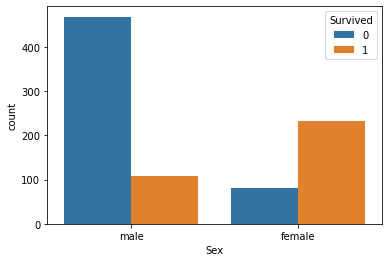

In [9]:
sb.countplot(x='Sex',hue='Survived',data=titanic)

In [10]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
titanic.groupby(['Sex','Pclass','Survived'])['Age'].mean()

Sex     Pclass  Survived
female  1       0           25.666667
                1           34.939024
        2       0           36.000000
                1           28.080882
        3       0           23.818182
                1           19.329787
male    1       0           44.581967
                1           36.248000
        2       0           33.369048
                1           16.022000
        3       0           27.255814
                1           22.274211
Name: Age, dtype: float64

In [13]:
titanic_Age = titanic

In [16]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [22]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [24]:
titanic['Sex']=pd.get_dummies(titanic['Sex'],drop_first=True)

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    uint8  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=titanic[['Pclass','Sex','Age', 'SibSp','Parch','Fare']]
y=titanic.Survived

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

In [34]:
confusion_matrix(y_test,model.predict(X_test))

array([[141,  34],
       [ 40,  80]], dtype=int64)

In [36]:
accuracy_score(y_test,model.predict(X_test))

0.7491525423728813